Analyse du Karaté aux Jeux Olympiques de Tokyo 2020

Source des données : Kaggle Tokyo 2020 Olympic Summer Games
https://www.kaggle.com/datasets/piterfm/tokyo-2020-olympics


Contexte : 

Le karaté a fait sa première et unique apparition olympique aux JO de Tokyo 2020, avec 8 épreuves réparties entre deux disciplines : le kata (technique) et le Kumite (combat).
Ce projet analyse les 32 médailles distribuées à 81 athlètes issus de 20 pays différents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Apercu des données

athletes = pd.read_csv('../data/raw/athletes.csv')
medals   = pd.read_csv('../data/raw/medals.csv')

print(athletes.shape)
print(medals.shape)

(11656, 14)
(2401, 12)


In [3]:

athletes.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AALERUD Katrine,AALERUD K,Female,1994-12-04,VESTBY,Norway,Norway,NOR,Cycling Road,CRD,NaN,NaN,NaN,../../../en/results/cycling-road/athlete-profi...
1,ABAD Nestor,ABAD N,Male,1993-03-29,ALCOI,Spain,Spain,ESP,Artistic Gymnastics,GAR,MADRID,Spain,1.65/5'4'',../../../en/results/artistic-gymnastics/athlet...
2,ABAGNALE Giovanni,ABAGNALE G,Male,1995-01-11,GRAGNANO,Italy,Italy,ITA,Rowing,ROW,SABAUDIA,Italy,1.98/6'5'',../../../en/results/rowing/athlete-profile-n13...
3,ABALDE Alberto,ABALDE A,Male,1995-12-15,FERROL,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,2.00/6'6'',../../../en/results/basketball/athlete-profile...
4,ABALDE Tamara,ABALDE T,Female,1989-02-06,VIGO,Spain,Spain,ESP,Basketball,BKB,NaN,NaN,1.92/6'3'',../../../en/results/basketball/athlete-profile...


In [4]:
medals.head()

,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code,discipline_code,event,country,discipline
0,Gold Medal,1,2021-07-24 00:00:00.0,KIM JD,KIM Je Deok,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
1,Gold Medal,1,2021-07-24 00:00:00.0,AN S,AN San,X,../../../en/results/archery/athlete-profile-n1...,KOR,ARC,Mixed Team,Republic of Korea,Archery
2,Silver Medal,2,2021-07-24 00:00:00.0,SCHLOESSER G,SCHLOESSER Gabriela,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
3,Silver Medal,2,2021-07-24 00:00:00.0,WIJLER S,WIJLER Steve,X,../../../en/results/archery/athlete-profile-n1...,NED,ARC,Mixed Team,Netherlands,Archery
4,Bronze Medal,3,2021-07-24 00:00:00.0,ALVAREZ L,ALVAREZ Luis,X,../../../en/results/archery/athlete-profile-n1...,MEX,ARC,Mixed Team,Mexico,Archery


In [5]:
#Filtrage pour la discipline du Karaté

print(medals['discipline'].unique())

print("\n")

print(athletes['discipline'].unique())

<StringArray>
[              'Archery',          'Cycling Road',               'Fencing',
                  'Judo',              'Shooting',             'Taekwondo',
         'Weightlifting',                'Diving',         'Skateboarding',
              'Swimming',   'Artistic Gymnastics',          'Canoe Slalom',
 'Cycling Mountain Bike',          'Table Tennis',             'Triathlon',
     'Baseball/Softball',            'Equestrian',               'Surfing',
        '3x3 Basketball',                'Rowing',          'Rugby Sevens',
             'Athletics',             'Badminton',    'Cycling BMX Racing',
                'Tennis', 'Trampoline Gymnastics',                'Boxing',
               'Sailing', 'Cycling BMX Freestyle',                  'Golf',
         'Cycling Track',             'Wrestling',          'Canoe Sprint',
     'Artistic Swimming',     'Marathon Swimming',                'Hockey',
                'Karate',        'Sport Climbing',      'Beach Volleyball'

In [6]:
# nombre de lignes et colonnes
medals_karate   = medals[medals['discipline'] == 'Karate']
athletes_karate = athletes[athletes['discipline'] == 'Karate']

print(medals_karate.shape)
print(athletes_karate.shape)

(32, 12)
(81, 14)


In [7]:
# vérification de l'état des données

print(medals_karate.isnull().sum())
print(athletes_karate.isnull().sum())


medal_type            0
medal_code            0
medal_date            0
athlete_short_name    0
athlete_name          0
athlete_sex           0
athlete_link          0
country_code          0
discipline_code       0
event                 0
country               0
discipline            0
dtype: int64
name                  0
short_name            0
gender                0
birth_date            0
birth_place          36
birth_country        30
country               0
country_code          0
discipline            0
discipline_code       0
residence_place      27
residence_country    31
height_m/ft          79
url                   0
dtype: int64


In [8]:
print(medals_karate.duplicated().sum())
print(athletes_karate.duplicated().sum())

0
0


In [9]:
print(medals_karate.dtypes)
print(athletes_karate.dtypes)

medal_type              str
medal_code            int64
medal_date              str
athlete_short_name      str
athlete_name            str
athlete_sex             str
athlete_link            str
country_code            str
discipline_code         str
event                   str
country                 str
discipline              str
dtype: object
name                 str
short_name           str
gender               str
birth_date           str
birth_place          str
birth_country        str
country              str
country_code         str
discipline           str
discipline_code      str
residence_place      str
residence_country    str
height_m/ft          str
url                  str
dtype: object


In [10]:
print(medals_karate['medal_type'].unique())


<StringArray>
['Gold Medal', 'Silver Medal', 'Bronze Medal']
Length: 3, dtype: str


In [11]:
#simplification 

medals_karate['medal_type'] = medals_karate['medal_type'].str.replace(' Medal', '')
print(medals_karate['medal_type'].unique())

<StringArray>
['Gold', 'Silver', 'Bronze']
Length: 3, dtype: str


In [12]:
# Nombre d'athlètes
print(f"Nombre total d'athlètes en Karaté : {athletes_karate['name'].nunique()}")

Nombre total d'athlètes en Karaté : 81


In [13]:
# nationalités différentes parmi les médaillés d'or 
print(df_joined[df_joined['medal_type'] == 'Gold']['country_x'].nunique())

NameError: name 'df_joined' is not defined

In [ ]:
#Analyse du nombre de médailles par pays

classement = medals_karate['country'].value_counts()
print(classement.head(10))

country
Turkey                        4
Japan                         3
Kazakhstan                    2
Spain                         2
Italy                         2
Ukraine                       2
Azerbaijan                    2
People's Republic of China    2
Egypt                         2
France                        1
Name: count, dtype: int64


la Turquie en terme de quantité de médaille à 4 médailles
le japon 3 médailles
.Il y a également 7 pays a 2 médailles
et la france 1 médaille.
Il n'y pas une domination extrême d'un pays en particulier dans ce sport il est plutôt équilibré.

In [ ]:
# Renommage
medals_karate['country'] = medals_karate['country'].str.replace("People's Republic of China", "China")
medals_karate['country'] = medals_karate['country'].str.replace("Chinese Taipei", "Taiwan")
medals_karate['country'] = medals_karate['country'].str.replace("Hong Kong, China", "Hong Kong")
medals_karate['country'] = medals_karate['country'].str.replace("Islamic Republic of Iran", "Iran")

print(medals_karate['country'].unique())

<StringArray>
[                  'France',                   'Turkey',
                   'Jordan',               'Kazakhstan',
                    'Spain',                    'Japan',
                'Hong Kong',                    'Italy',
                 'Bulgaria',                  'Ukraine',
                  'Austria',                   'Taiwan',
 'United States of America',               'Azerbaijan',
                  'Hungary',                   'Serbia',
                    'China',                    'Egypt',
                     'Iran',             'Saudi Arabia']
Length: 20, dtype: str


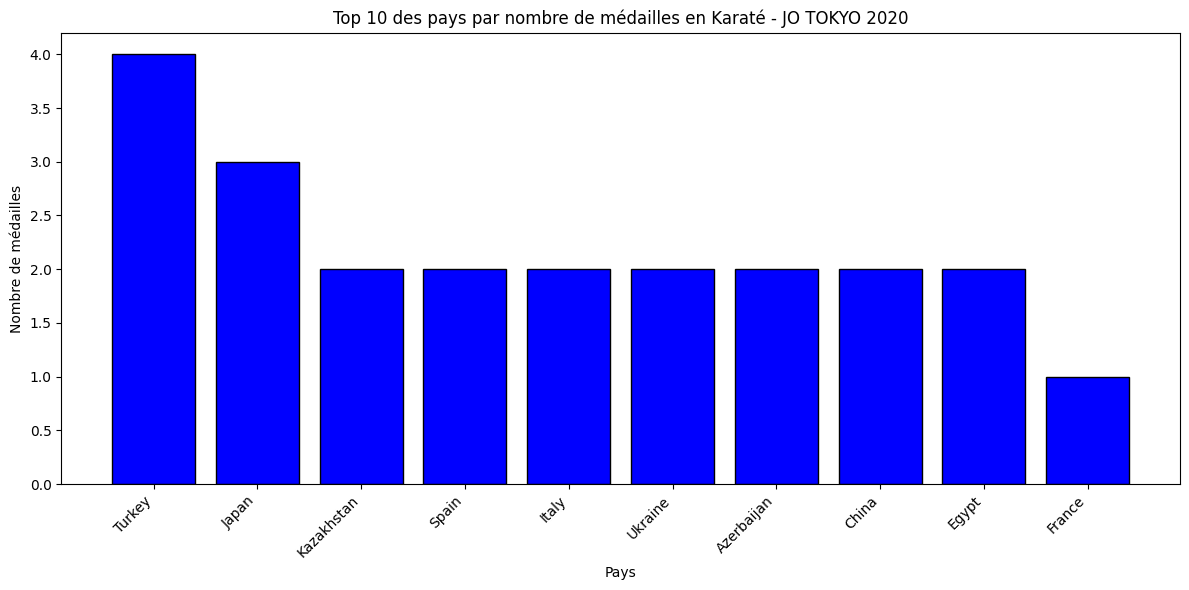

In [ ]:


classement = medals_karate['country'].value_counts().head(10)

plt.figure(figsize=(12,6))
plt.bar(classement.index, classement.values, color='blue', edgecolor='black')

plt.title('Top 10 des pays par nombre de médailles en Karaté - JO TOKYO 2020')
plt.xlabel('Pays')
plt.ylabel('Nombre de médailles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Séparer par type de médaille pour déterminer la qualité des médaillés
gold   = medals_karate[medals_karate['medal_type'] == 'Gold']['country'].value_counts()
silver = medals_karate[medals_karate['medal_type'] == 'Silver']['country'].value_counts()
bronze = medals_karate[medals_karate['medal_type'] == 'Bronze']['country'].value_counts()

print("Or")
print(gold)

print("\nArgent")
print(silver)

print("\nBronze")
print(bronze)

Or
country
France      1
Spain       1
Bulgaria    1
Japan       1
Italy       1
Serbia      1
Iran        1
Egypt       1
Name: count, dtype: int64

Argent
country
Azerbaijan      2
Turkey          1
Japan           1
Ukraine         1
Spain           1
China           1
Saudi Arabia    1
Name: count, dtype: int64

Bronze
country
Turkey                      3
Kazakhstan                  2
Jordan                      1
Hong Kong                   1
Italy                       1
Austria                     1
Taiwan                      1
United States of America    1
Hungary                     1
Ukraine                     1
Egypt                       1
Japan                       1
China                       1
Name: count, dtype: int64


In [ ]:
gold = medals_karate[medals_karate['medal_type'] == 'Gold']['country'].value_counts().reset_index()
gold.columns = ['Pays', 'Médailles Or']
gold.index = gold.index + 1
gold

,Pays,Médailles Or
1,France,1
2,Spain,1
3,Bulgaria,1
4,Japan,1
5,Italy,1
6,Serbia,1
7,Iran,1
8,Egypt,1


In [ ]:
silver = medals_karate[medals_karate['medal_type'] == 'Silver']['country'].value_counts().reset_index()
silver.columns = ['Pays', 'Médailles Argent']
silver.index = silver.index + 1
silver

,Pays,Médailles Argent
1,Azerbaijan,2
2,Turkey,1
3,Japan,1
4,Ukraine,1
5,Spain,1
6,China,1
7,Saudi Arabia,1


In [ ]:
bronze = medals_karate[medals_karate['medal_type'] == 'Bronze']['country'].value_counts().reset_index()
bronze.columns = ['Pays', 'Médailles Bronze']
bronze.index = bronze.index + 1
bronze

,Pays,Médailles Bronze
1,Turkey,3
2,Kazakhstan,2
3,Jordan,1
4,Hong Kong,1
5,Italy,1
6,Austria,1
7,Taiwan,1
8,United States of America,1
9,Hungary,1
10,Ukraine,1


In [ ]:

recap = medals_karate.groupby(['country', 'medal_type']).size().unstack(fill_value=0)


recap['Total']  = recap['Gold'] + recap['Silver'] + recap['Bronze']
recap['Points'] = (recap['Gold'] * 3) + (recap['Silver'] * 2) + (recap['Bronze'] * 1)


recap = recap.sort_values(by=['Points', 'Gold'], ascending=False)
recap.index.name = 'Pays'
recap = recap.reset_index()
recap.index = recap.index + 1

recap

medal_type,Pays,Bronze,Gold,Silver,Total,Points
1,Japan,1,1,1,3,6
2,Spain,0,1,1,2,5
3,Turkey,3,0,1,4,5
4,Egypt,1,1,0,2,4
5,Italy,1,1,0,2,4
6,Azerbaijan,0,0,2,2,4
7,Bulgaria,0,1,0,1,3
8,France,0,1,0,1,3
9,Iran,0,1,0,1,3
10,Serbia,0,1,0,1,3


le Japon et l'Espagne sont devant la turquie car la qualité des médailles est meilleurs

In [ ]:
#parité totale entre hommes et femmes par le CIO et la WKF pour les JO
print(medals_karate['athlete_sex'].unique())

genre = medals_karate['athlete_sex'].value_counts().reset_index()
genre.columns = ['Genre', 'Nombre de médailles']
genre['Genre'] = genre['Genre'].replace({'M': 'Hommes', 'W': 'Femmes'})
genre

<StringArray>
['M', 'W']
Length: 2, dtype: str


,Genre,Nombre de médailles
0,Hommes,16
1,Femmes,16


In [ ]:
# 8 épreuves au total

print(medals_karate['event'].unique())



<StringArray>
[  'Men's Kumite -67kg',         'Women's Kata', 'Women's Kumite -55kg',
           'Men's Kata',   'Men's Kumite -75kg', 'Women's Kumite -61kg',
   'Men's Kumite +75kg', 'Women's Kumite +61kg']
Length: 8, dtype: str


In [ ]:
medals_karate['subdiscipline'] = np.where(
    medals_karate['event'].str.contains('Kata'),  
    'Kata',                                         
    'Kumite'                                       
)

medals_karate[['event', 'subdiscipline']].drop_duplicates()



,event,subdiscipline
1481,Men's Kumite -67kg,Kumite
1485,Women's Kata,Kata
1489,Women's Kumite -55kg,Kumite
1706,Men's Kata,Kata
1710,Men's Kumite -75kg,Kumite
1714,Women's Kumite -61kg,Kumite
2108,Men's Kumite +75kg,Kumite
2112,Women's Kumite +61kg,Kumite


In [ ]:
subdiscipline_count = medals_karate['subdiscipline'].value_counts().reset_index()
subdiscipline_count.columns = ['Subdiscipline', 'Nombre de médailles']

print(subdiscipline_count)



  Subdiscipline  Nombre de médailles
0        Kumite                   24
1          Kata                    8


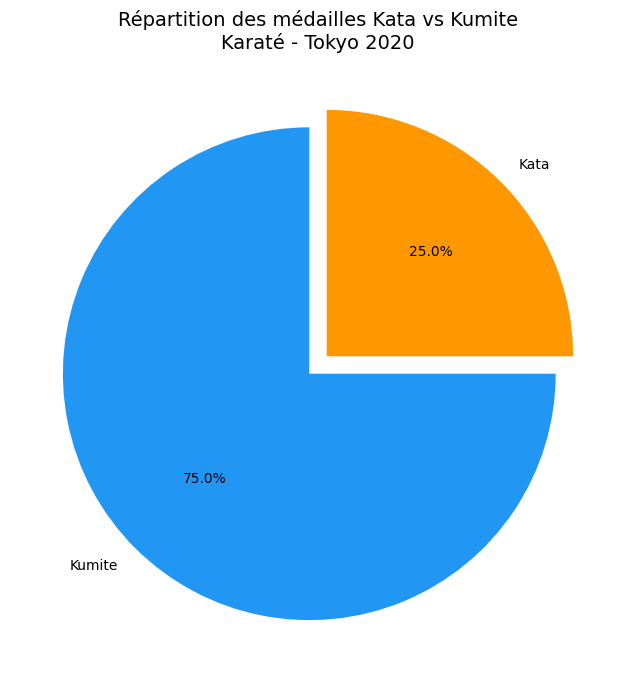

subdiscipline
Kata      2
Kumite    6
Name: event, dtype: int64


In [ ]:

couleurs = ['#2196F3', '#FF9800']

plt.figure(figsize=(8, 8))
plt.pie(
    subdiscipline_count['Nombre de médailles'],
    labels=subdiscipline_count['Subdiscipline'],
    colors=couleurs,
    autopct='%1.1f%%',      
    startangle=90,            
    explode=(0.05, 0.05)      
)

plt.title('Répartition des médailles Kata vs Kumite\nKaraté - Tokyo 2020', fontsize=14)
plt.show()

print(medals_karate.groupby('subdiscipline')['event'].nunique())

Le Kumite compte 6 épreuves contre 2 pour le kata, soit 3 fois plus de médailles dsitribuées pour le kumite.
La répartition 75%/25% reflète un choix des organisateurs et non l'importance des deux disciplines dans le karaté.

In [ ]:
print("Colonnes medals_karate :", medals_karate.columns.tolist())
print("Colonnes athletes_karate :", athletes_karate.columns.tolist())

Colonnes medals_karate : ['medal_type', 'medal_code', 'medal_date', 'athlete_short_name', 'athlete_name', 'athlete_sex', 'athlete_link', 'country_code', 'discipline_code', 'event', 'country', 'discipline', 'subdiscipline']
Colonnes athletes_karate : ['name', 'short_name', 'gender', 'birth_date', 'birth_place', 'birth_country', 'country', 'country_code', 'discipline', 'discipline_code', 'residence_place', 'residence_country', 'height_m/ft', 'url']


In [ ]:
df_joined = pd.merge(
    medals_karate,
    athletes_karate,
    left_on='athlete_name',   
    right_on='name',          
    how='left'                
)

print(df_joined.shape)
df_joined.head()

(32, 27)


,medal_type,medal_code,medal_date,athlete_short_name,athlete_name,athlete_sex,athlete_link,country_code_x,discipline_code_x,event,...,birth_place,birth_country,country_y,country_code_y,discipline_y,discipline_code_y,residence_place,residence_country,height_m/ft,url
0,Gold,1,2021-08-05 00:00:00.0,da COSTA S,da COSTA Steven,M,../../../en/results/karate/athlete-profile-n13...,FRA,KTE,Men's Kumite -67kg,...,MONT-SAINT-MARTIN,France,France,FRA,Karate,KTE,MONT-SAINT-MARTIN,France,NaN,../../../en/results/karate/athlete-profile-n13...
1,Silver,2,2021-08-05 00:00:00.0,SAMDAN E,SAMDAN Eray,M,../../../en/results/karate/athlete-profile-n13...,TUR,KTE,Men's Kumite -67kg,...,KOCAELI,Turkey,Turkey,TUR,Karate,KTE,DARICA,Turkey,NaN,../../../en/results/karate/athlete-profile-n13...
2,Bronze,3,2021-08-05 00:00:00.0,ALMASATFA AR,ALMASATFA Abdel Rahman,M,../../../en/results/karate/athlete-profile-n14...,JOR,KTE,Men's Kumite -67kg,...,NaN,NaN,Jordan,JOR,Karate,KTE,AMMAN,Jordan,NaN,../../../en/results/karate/athlete-profile-n14...
3,Bronze,3,2021-08-05 00:00:00.0,ASSADILOV D,ASSADILOV Darkhan,M,../../../en/results/karate/athlete-profile-n13...,KAZ,KTE,Men's Kumite -67kg,...,SARYAGHASH,Kazakhstan,Kazakhstan,KAZ,Karate,KTE,SHYMKENT,Kazakhstan,NaN,../../../en/results/karate/athlete-profile-n13...
4,Gold,1,2021-08-05 00:00:00.0,SANCHEZ JAIME S,SANCHEZ JAIME Sandra,W,../../../en/results/karate/athlete-profile-n13...,ESP,KTE,Women's Kata,...,NaN,NaN,Spain,ESP,Karate,KTE,NaN,NaN,NaN,../../../en/results/karate/athlete-profile-n13...


In [ ]:

df_joined['birth_date'] = pd.to_datetime(df_joined['birth_date'])


tokyo_date = pd.to_datetime('2021-08-05')

# Calcule de l'âge
df_joined['age'] = (tokyo_date - df_joined['birth_date']).dt.days // 365

df_joined[['athlete_name', 'birth_date', 'age']].head(10)

,athlete_name,birth_date,age
0,da COSTA Steven,1997-01-23,24
1,SAMDAN Eray,1997-07-25,24
2,ALMASATFA Abdel Rahman,1996-05-26,25
3,ASSADILOV Darkhan,1987-08-27,33
4,SANCHEZ JAIME Sandra,1981-09-16,39
5,SHIMIZU Kiyou,1993-12-07,27
6,LAU Mo Sheung Grace,1991-10-19,29
7,BOTTARO Viviana,1987-09-02,33
8,GORANOVA Ivet,2000-03-06,21
9,TERLIUGA Anzhelika,1992-03-27,29


In [ ]:
print("Âge moyen :", df_joined['age'].mean().round(1))
print("Âge minimum :", df_joined['age'].min())
print("Âge maximum :", df_joined['age'].max())
print("Âge médian :", df_joined['age'].median())

# athlète médaillé le plus jeune et le plus vieux
print(" PLUS VIEUX MÉDAILLÉ ")
print(df_joined.loc[df_joined['age'].idxmax(), ['athlete_name', 'age', 'subdiscipline', 'country_x', 'medal_type']])

print("\n PLUS JEUNE MÉDAILLÉ ")
print(df_joined.loc[df_joined['age'].idxmin(), ['athlete_name', 'age', 'subdiscipline', 'country_x', 'medal_type']])

Âge moyen : 27.6
Âge minimum : 20
Âge maximum : 39
Âge médian : 27.0
 PLUS VIEUX MÉDAILLÉ 
athlete_name     SANCHEZ JAIME Sandra
age                                39
subdiscipline                    Kata
country_x                       Spain
medal_type                       Gold
Name: 4, dtype: object

 PLUS JEUNE MÉDAILLÉ 
athlete_name     BERULTSEVA Sofya
age                            20
subdiscipline              Kumite
country_x              Kazakhstan
medal_type                 Bronze
Name: 31, dtype: object


Sandra Sanchez a gagné l'OR en Kata à 39 ans. Elle prouve que la discipline du  Kata valorise l'expérience et la maturité technique accumulée sur plusieurs années de pratique.
Sofya Berultseva à 20 ans obtient le bronze en Kumite cela montre que cette discipline valorise la jeunesse et l'explosivité.

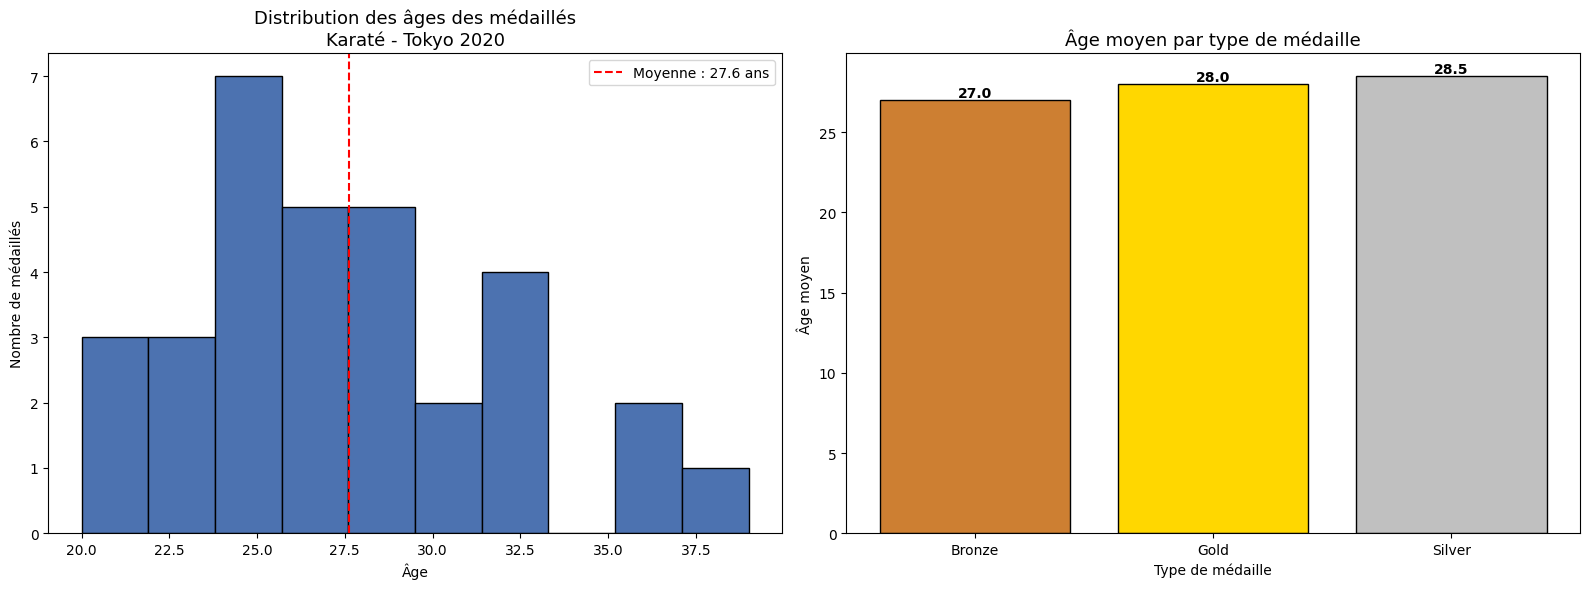

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogramme général
axes[0].hist(df_joined['age'], bins=10, color='#4C72B0', edgecolor='black')
axes[0].set_title('Distribution des âges des médaillés\nKaraté - Tokyo 2020', fontsize=13)
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Nombre de médaillés')
axes[0].axvline(df_joined['age'].mean(), color='red', linestyle='--', label=f"Moyenne : {df_joined['age'].mean().round(1)} ans")
axes[0].legend()

# Âge moyen par type de médaille
age_medal = df_joined.groupby('medal_type')['age'].mean().round(1)
axes[1].bar(age_medal.index, age_medal.values, 
            color=['#cd7f32', 'gold', 'silver'], edgecolor='black')
axes[1].set_title('Âge moyen par type de médaille', fontsize=13)
axes[1].set_xlabel('Type de médaille')
axes[1].set_ylabel('Âge moyen')

for i, v in enumerate(age_medal.values):
    axes[1].text(i, v + 0.2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
print(df_joined.groupby('subdiscipline')['age'].mean().round(1))

NameError: name 'df_joined' is not defined

In [ ]:
age_subdiscipline = df_joined.groupby('subdiscipline')['age'].agg(['mean', 'min', 'max']).round(1)
age_subdiscipline.columns = ['Âge moyen', 'Âge minimum', 'Âge maximum']
age_subdiscipline

,Âge moyen,Âge minimum,Âge maximum
subdiscipline,,,
Kata,30.6,23,39
Kumite,26.6,20,36


In [ ]:
age_detail = df_joined.groupby(['subdiscipline', 'athlete_sex'])['age'].mean().round(1).reset_index()
age_detail['athlete_sex'] = age_detail['athlete_sex'].replace({'M': 'Hommes', 'W': 'Femmes'})
age_detail.columns = ['Discipline', 'Genre', 'Âge moyen']
age_detail

,Discipline,Genre,Âge moyen
0,Kata,Hommes,29.2
1,Kata,Femmes,32.0
2,Kumite,Hommes,28.2
3,Kumite,Femmes,25.0


Le Kata est une discipline dans le karaté où l'expérience et la maîtrise technique accumulée sur plusieurs années démontre que les athlètes les plus âgés qui pratique cet art plus longtemps sont plus enclin à etre meilleur dans le domaine du Kata.

Le Kumite en revanche demande de l'explosivité et de la réactivité, des qualités qu'on retrouve plus tôt dans une carrière sportive. Cet analyse est d'ailleurs cohérent avec ce qu'on observe dans d'autres sports : arts martiaux techniques contre sports de combat dynamiques.

In [ ]:
# les fichiers propres
medals_karate.to_csv('medals_karate_clean.csv', index=False)
athletes_karate.to_csv('athletes_karate_clean.csv', index=False)
df_joined.to_csv('karate_joined_clean.csv', index=False)

Cette analyse des résultats du karaté aux Jeux Olympiques de Tokyo 2020 permet de dégager quatre analyses principales :

Les 32 médailles ont été réparties entre 18 pays différents, cela démontre qu'il n'y pas forcément pays plus dominant qu'un autre dans cette discipline.


La Turquie à le plus de médaille mais n'a remporté aucun titre olympique.
Le Japon est le plus régulier avec une médaille de chaque podium.

les 32 médailles ont été uniformément répartie entre les athlètes masculin et féminin.


Les médaillés en Kata ont en moyenne 30,6 ans contre 26,6 ans en Kumite.
Cette différence de 4 ans montre que le Kata, discipline technique et artistique, récompense l'expérience, la forme et la maturité
tandis que le Kumite qui se rapproche plus des sports de combat traditionnel est plus physique et explosif, cela favorise donc des athlètes plus jeunes au pic de leur condition physique.


Avec 6 épreuves de Kumite
pour seulement 2 en Kata, la répartition 75%/25% des médailles est purement un choix des organisateurs et ne
reflète pas l'importance des deux disciplines dans le karaté.